In [28]:
import networkx as nx
import pandas as pd
import numpy as np
import re
import seaborn as sns
import collections
import community
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from nltk.corpus import stopwords
from time import time
from collections import Counter
from nltk.corpus import wordnet as wn

In [3]:

file1 = open('tarzan.txt', 'r')
lines = file1.readlines()

In [4]:
len(lines)

11431

In [5]:
no_n = [line for line in lines if line != "\n"]

In [6]:
len(no_n)

8464

In [7]:
count = 0

for line in no_n:
    
    if line == 'Chapter I\n':
        print(count)
    count += 1

44


In [8]:
count = 0

for line in no_n:
    
    if "End of Project Gut" in line:
        print(count)
    count += 1




8166


In [9]:
# initialise book by removing rubbish at start and end
start = no_n[44:8166]

In [10]:
sents = pd.DataFrame.from_dict({i:start[i].lower() for i in range(len(start))},orient='index', columns=["sent"])

In [11]:
sid = SentimentIntensityAnalyzer()
sents["scores"] = sents["sent"].apply(lambda x: sid.polarity_scores(x))

In [12]:
sents['compound']  = sents['scores'].apply(lambda score_dict: score_dict['compound'])

In [13]:
sents['comp_score'] = sents['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

In [14]:
sents["comp_score"].value_counts().apply(lambda x: x/sents["comp_score"].value_counts().sum())

pos    0.731839
neg    0.268161
Name: comp_score, dtype: float64

In [97]:
sents[sents["comp_score"] == "neg"].loc[2,"sent"]

'i had this story from one who had no business to tell it to me, or to\n'

In [16]:
stop = stopwords.words('english')
stop.extend(STOPWORDS)
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
sents["no_stop"] = sents['sent'].apply(lambda x: [y for y in x.split() if y not in stop])

In [18]:
remove_empty = sents[sents["no_stop"].str.len() != 0]

In [19]:
remove_empty[[True if "pass" in each else False for each in remove_empty["no_stop"]]]

,sent,scores,compound,comp_score,no_stop
3229,"tarzan let the first two pass beneath him, but...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,pos,"[tarzan, let, first, two, pass, beneath, him,,..."
3296,if you ever chance to pass that far off africa...,"{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp...",0.25,pos,"[chance, pass, far, african, village, still]"


In [102]:
big = pd.read_csv("words_for_big.csv",index_col=False)
big.drop(columns="Unnamed: 0",inplace=True)

list_big = [syn for syn in big["Big"]]

# break too
brek = pd.read_csv("words_for_break.csv",index_col=False)
brek.drop(columns="Unnamed: 0",inplace=True)

list_break = [syn for syn in brek["Break"]]

# bad
bad = pd.read_csv("words_for_bad.csv",index_col=False)
bad.drop(columns="Unnamed: 0",inplace=True)

list_bad = [syn for syn in bad["bad"]]

# good
good = pd.read_csv("words_for_good.csv",index_col=False)
good.drop(columns="Unnamed: 0",inplace=True)

list_good = [syn for syn in good["good"]]

# highest eigenvector (not very high)
deal = pd.read_csv("words_for_deal.csv",index_col=False)
deal.drop(columns="Unnamed: 0",inplace=True)

list_deal = [syn for syn in deal["deal"]]


In [103]:
remove_empty[remove_empty["sent"].str.contains('|'.join(list_big)) == True]

,sent,scores,compound,comp_score,no_stop
56,"of greater importance and responsibility; but,...","{'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'comp...",0.7783,pos,"[greater, importance, responsibility;, but,, h..."
115,"small--a huge bear of a man, with fierce black...","{'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'comp...",0.7506,pos,"[small--a, huge, bear, man,, fierce, black, mu..."
122,blank at the great mountain of muscle towering...,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.3716,pos,"[blank, great, mountain, muscle, towering, him..."
137,"wounded comrade to rise. the big fellow, who ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,"[wounded, comrade, rise., big, fellow,, known,..."
165,below by four of his fellows while the first m...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,"[four, fellows, first, mate,, heavy, belaying,..."
...,...,...,...,...,...
8001,"may clear up a mystery. it can do no worse, a...","{'neg': 0.062, 'neu': 0.672, 'pos': 0.266, 'co...",0.6065,pos,"[may, clear, mystery., worse,, rate,, leave]"
8034,giant when his great arms were about her in th...,"{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'comp...",0.6249,pos,"[giant, great, arms, distant, african, forest,]"
8046,again she glanced at clayton. he was very han...,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.5413,pos,"[glanced, clayton., handsome, every, inch]"
8068,made a worse one.\n,"{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'comp...",-0.4767,neg,"[made, worse, one.]"


In [104]:
remove_empty[remove_empty["sent"].str.contains('|'.join(list_big)) == True]["comp_score"].value_counts()

pos    328
neg     57
Name: comp_score, dtype: int64

In [105]:
remove_empty[remove_empty["sent"].str.contains('|'.join(list_bad)) == True]["comp_score"].value_counts().apply(lambda x: x/remove_empty[remove_empty["sent"].str.contains('|'.join(list_bad)) == True]["comp_score"].value_counts().sum())

neg    0.555556
pos    0.444444
Name: comp_score, dtype: float64

In [106]:
remove_empty[remove_empty["sent"].str.contains('|'.join(list_good)) == True]["comp_score"].value_counts().apply(lambda x: x/remove_empty[remove_empty["sent"].str.contains('|'.join(list_good)) == True]["comp_score"].value_counts().sum())

pos    0.754545
neg    0.245455
Name: comp_score, dtype: float64

In [107]:
remove_empty[remove_empty["sent"].str.contains('|'.join(list_deal)) == True]

,sent,scores,compound,comp_score,no_stop
6,when my convivial host discovered that he had ...,"{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'comp...",0.2960,pos,"[convivial, host, discovered, told, much,]"
14,taken fictitious names for the principal chara...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,"[taken, fictitious, names, principal, characte..."
18,"my convivial host, and so i give you the story...","{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'comp...",0.2960,pos,"[convivial, host,, give, story, painstakingly]"
27,"recruiting soldiers for its native army, which...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,"[recruiting, soldiers, native, army,, used, so..."
39,thorough investigation of the unfair treatment...,"{'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'comp...",-0.4767,neg,"[thorough, investigation, unfair, treatment, b..."
...,...,...,...,...,...
8095,tarzan took the envelope and tore it open. th...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,"[tarzan, took, envelope, tore, open., message]"
8101,extended hand.\n,"{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'comp...",0.4939,pos,"[extended, hand.]"
8106,it would take away his title and his lands and...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,"[take, away, title, lands, castles,, and--it]"
8107,"would take them away from jane porter also. ""...","{'neg': 0.178, 'neu': 0.822, 'pos': 0.0, 'comp...",-0.3818,neg,"[take, away, jane, porter, also., ""i, say,, ol..."


In [108]:
remove_empty[remove_empty["sent"].str.contains('|'.join(list_deal)) == True]["comp_score"].value_counts()


pos    499
neg    137
Name: comp_score, dtype: int64

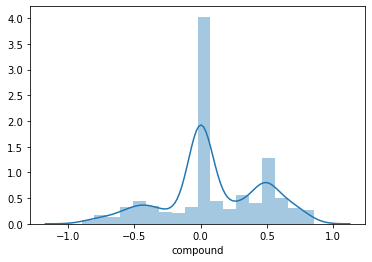

In [109]:
sns.distplot(remove_empty[remove_empty["sent"].str.contains('|'.join(list_deal)) == True]["compound"])

# Bag of words on positive sentences

In [35]:
positive = [" ".join(sent) for sent in remove_empty[remove_empty["comp_score"] == "pos"]["no_stop"]]
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(positive)
words_counted = pd.DataFrame.from_dict(vectorizer.vocabulary_,orient='index', columns=["Count"])
words_counted.sort_values(by="Count",ascending=False)

,Count
zoological,6041
zoo,6040
zest,6039
zealous,6038
zeal,6037
...,...
1888,4
17,3
16,2
1550,1


Extracting tf features for LDA...
done in 0.058s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.142s.


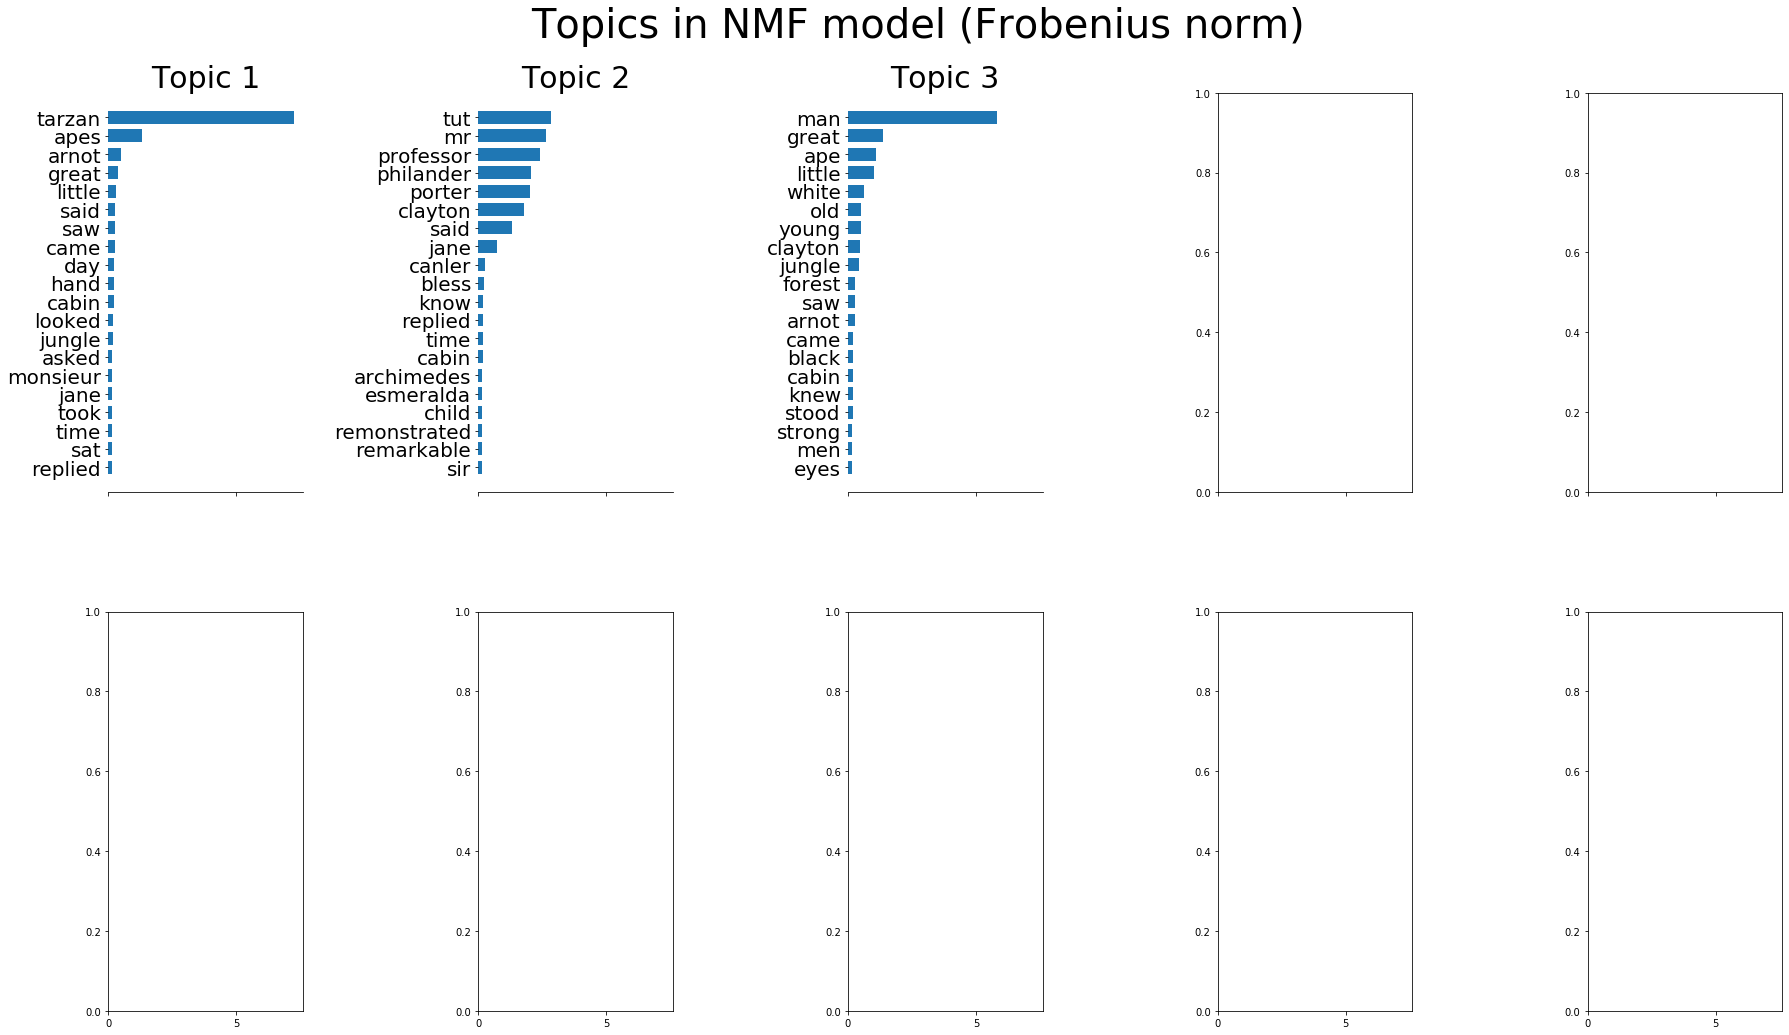

In [44]:
n_samples = 2000
n_features = 1000
n_components = 3
n_top_words = 20

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(positive)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm)')

# Bag of words on negative sentences

In [24]:
negative = [" ".join(sent) for sent in remove_empty[remove_empty["comp_score"] == "neg"]["no_stop"]]

X = vectorizer.fit_transform(negative)
words_counted = pd.DataFrame.from_dict(vectorizer.vocabulary_,orient='index', columns=["Count"])
words_counted.sort_values(by="Count",ascending=False)

,Count
youth,3673
yourselves,3672
yourself,3671
youngest,3670
young,3669
...,...
abduction,4
abated,3
abandoning,2
abandoned,1


In [37]:
negative

['story one business tell me,',
 'narrator beginning it, skeptical incredulity',
 'days followed balance strange tale.',
 'prone doubtfulness, foolish pride assumed task old',
 'yellow, mildewed pages diary man long dead,',
 "records colonial office dead man's diary",
 'clayton, lord greystoke, commissioned make peculiarly delicate',
 'forcible collection rubber ivory savage tribes along',
 'complained many young men enticed away',
 'englishmen africa went even further, saying poor',
 'blacks held virtual slavery, terms',
 'enlistment expired ignorance imposed upon white',
 'thorough investigation unfair treatment black british',
 'dangers isolation tropical africa appalled him.',
 'sake refused appointment,',
 'freetown half dozen british war vessels scouring south',
 'board, search stopped ere scarce begun; though',
 'crews composed offscourings sea--unhanged murderers',
 'fuwalda exception rule. officers swarthy',
 'bullies, hating hated crew. captain,',
 'least used, two arguments 

In [23]:
n_top_words = 20
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


Extracting tf features for LDA...
done in 0.127s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.078s.


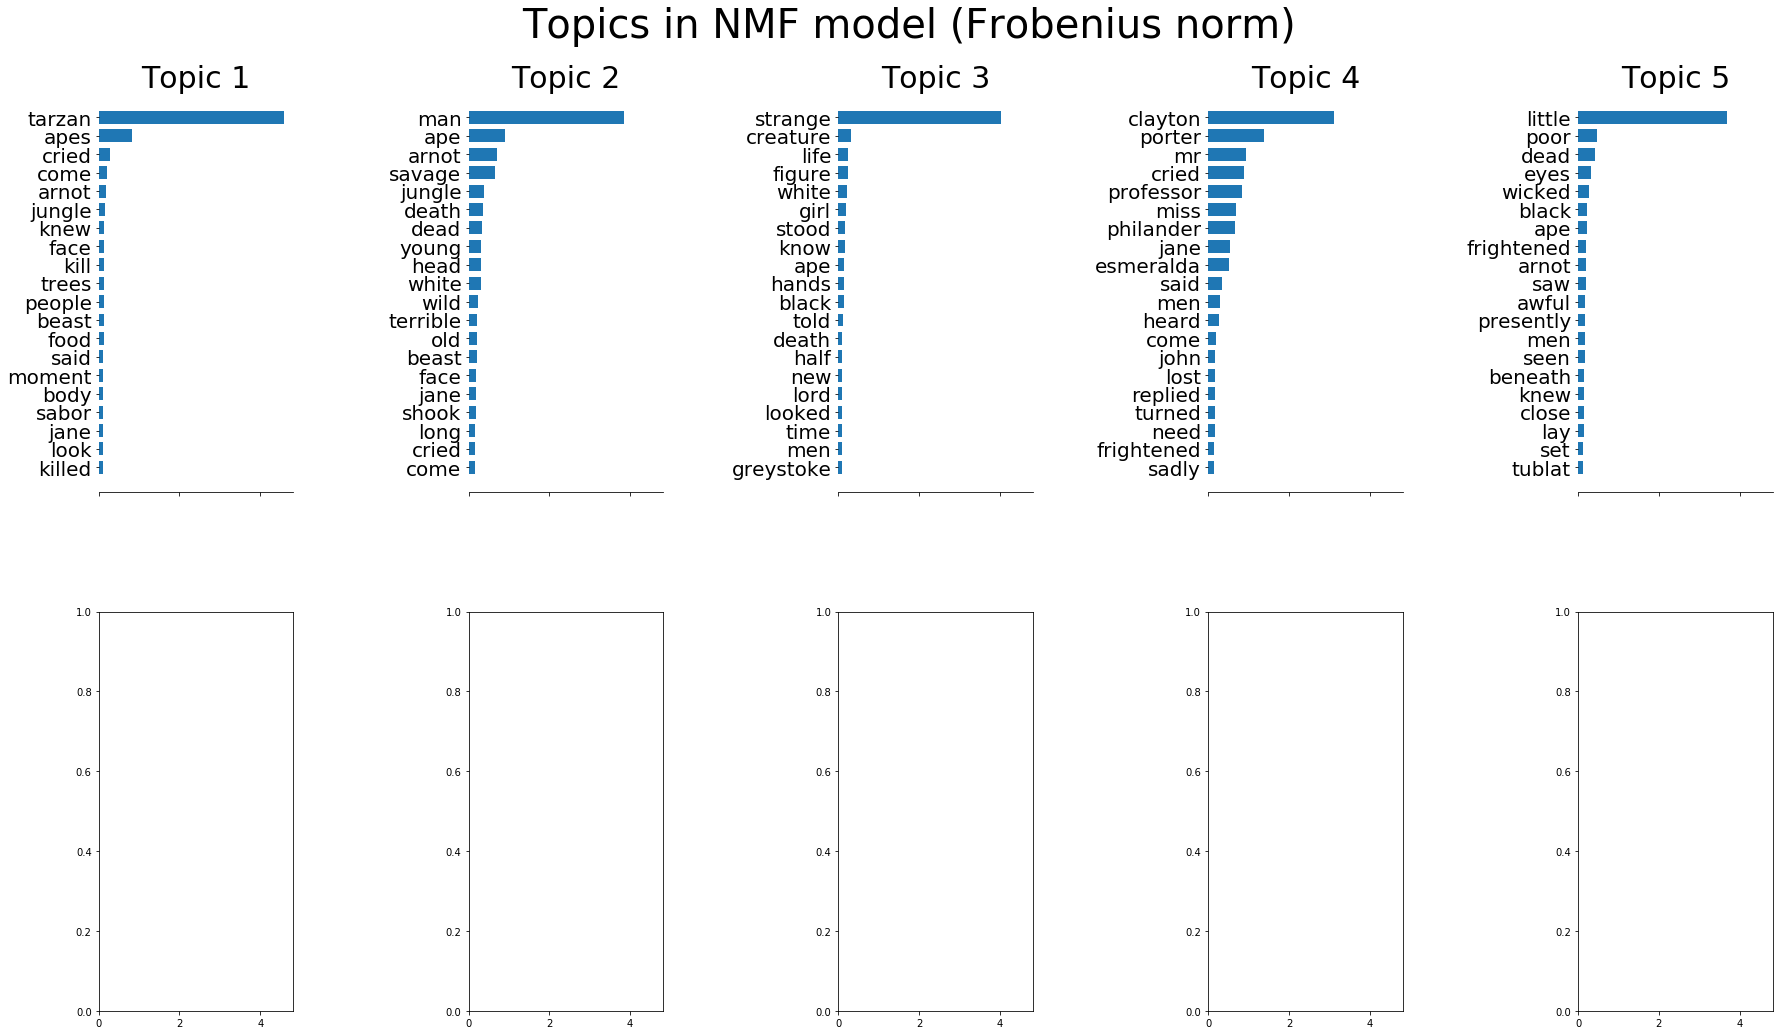

In [41]:
n_samples = 2000
n_features = 1000
n_components = 5
n_top_words = 20

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(negative)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm)')